In [8]:
# EDA Project Group 3 - The Millionaire Socialite (Group members: David, Daniela, Atai, Hafsa)
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
# Load the dataset
df = pd.read_csv('KC_housing_data.csv')

# Display the first few rows of the dataset
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


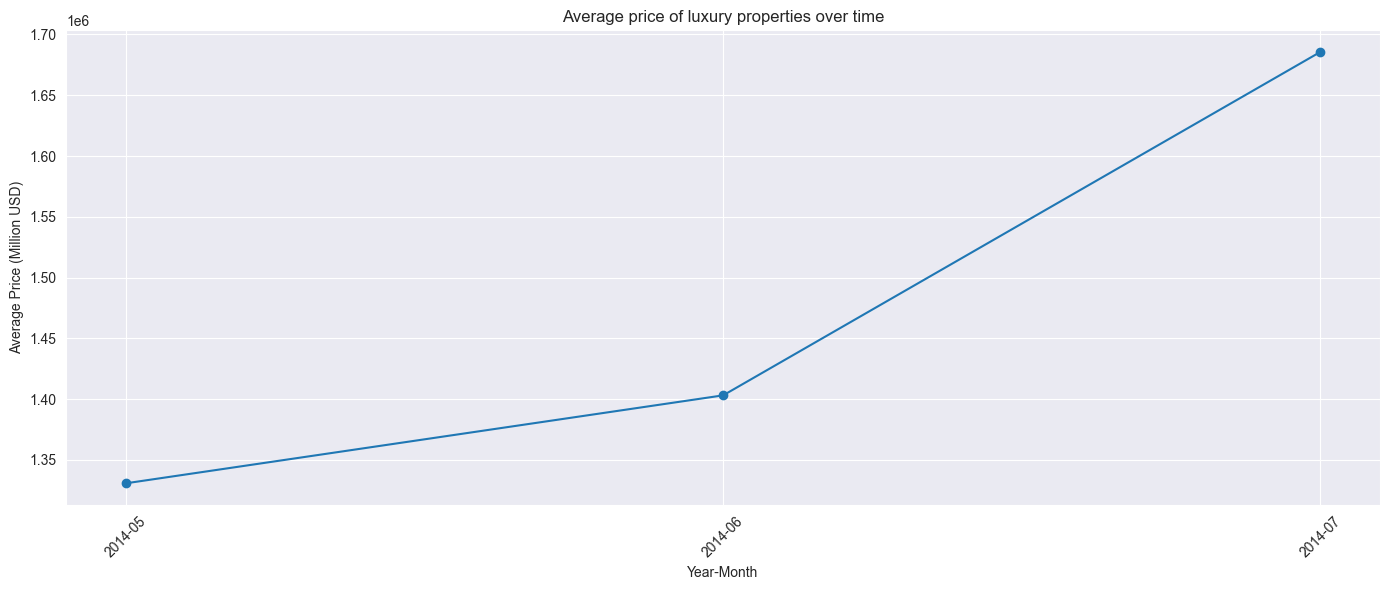

Price peak: 2014-07 with an average of 1,685,590 USD
Price dip: 2014-05 with an anverage of 1,330,742 USD


In [10]:
# Step 1: Convert date to year and month
# Format: YYYY-MM-DD HH:MM:SS
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d %H:%M:%S')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

# Step 2: Define a luxury property (Top 10% by price)
luxury_threshold = df['price'].quantile(0.9)
luxury_df = df[df['price'] >= luxury_threshold].copy()

# Step 3: Average price per month / year for luxury properties
luxury_monthly = luxury_df.groupby(['year', 'month'])['price'].mean().reset_index()
luxury_monthly['year_month'] = luxury_monthly['year'].astype(str) + '-' + luxury_monthly['month'].astype(str).str.zfill(2)

# Step 4: Creating a line plot to visualize price trends over time
plt.figure(figsize=(14,6))
plt.plot(luxury_monthly['year_month'], luxury_monthly['price'], marker='o')
plt.xticks(rotation=45)
plt.title('Average price of luxury properties over time')
plt.xlabel('Year-Month')
plt.ylabel('Average Price (Million USD)')
plt.tight_layout()
plt.show()

# Step 5: Identify times with price peaks and dips
peak = luxury_monthly.loc[luxury_monthly['price'].idxmax()]
dip = luxury_monthly.loc[luxury_monthly['price'].idxmin()]
print(f'Price peak: {peak["year_month"]} with an average of {peak["price"]:,.0f} USD')
print(f'Price dip: {dip["year_month"]} with an anverage of {dip["price"]:,.0f} USD')
# Conclusion: The best time to buy would be in the months with the lowest average price.

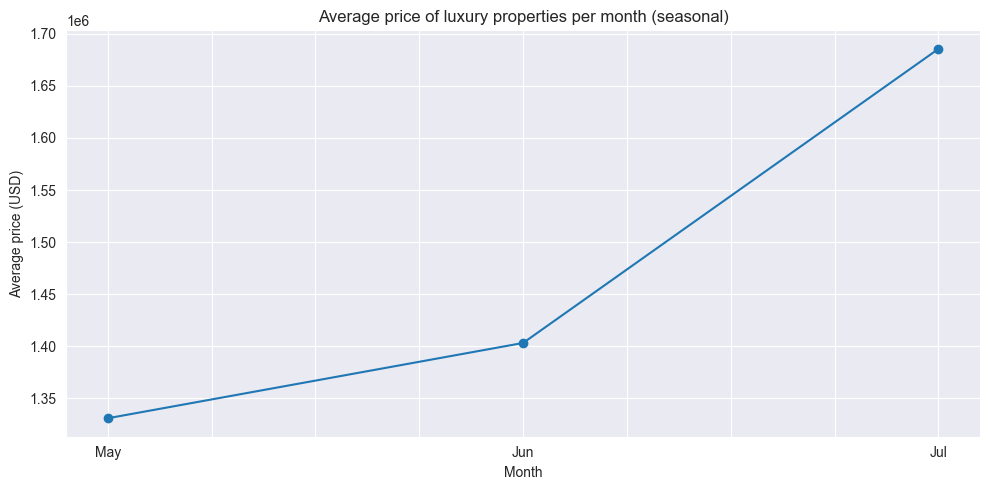

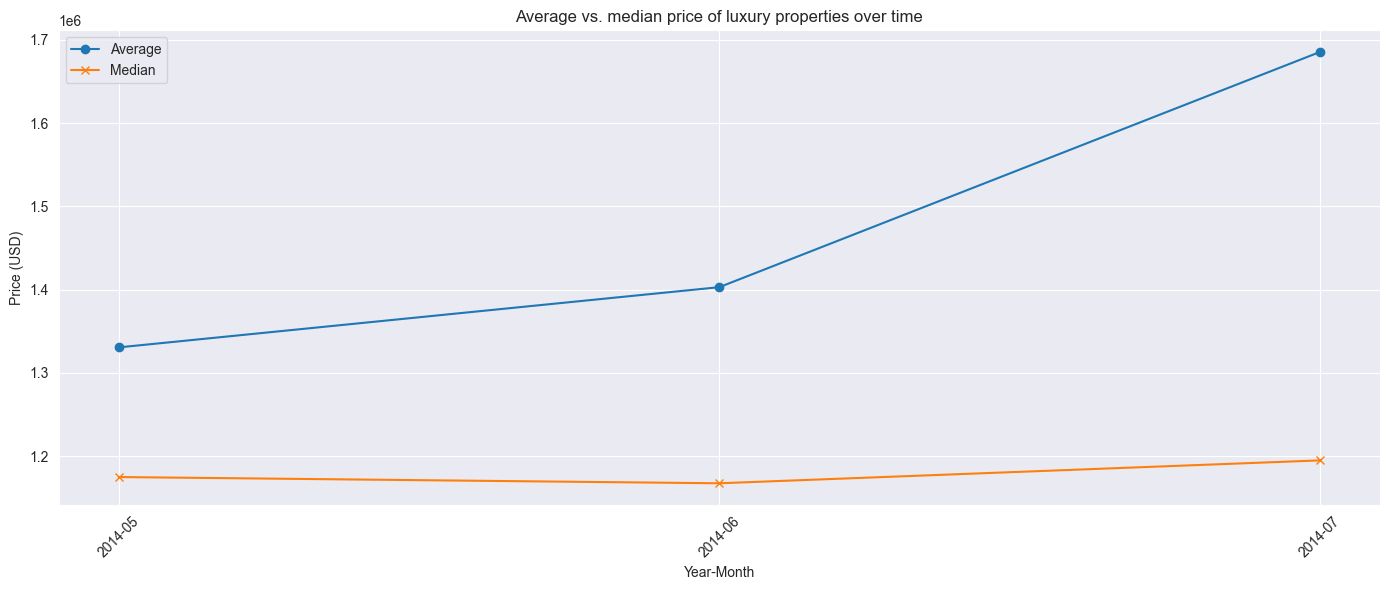

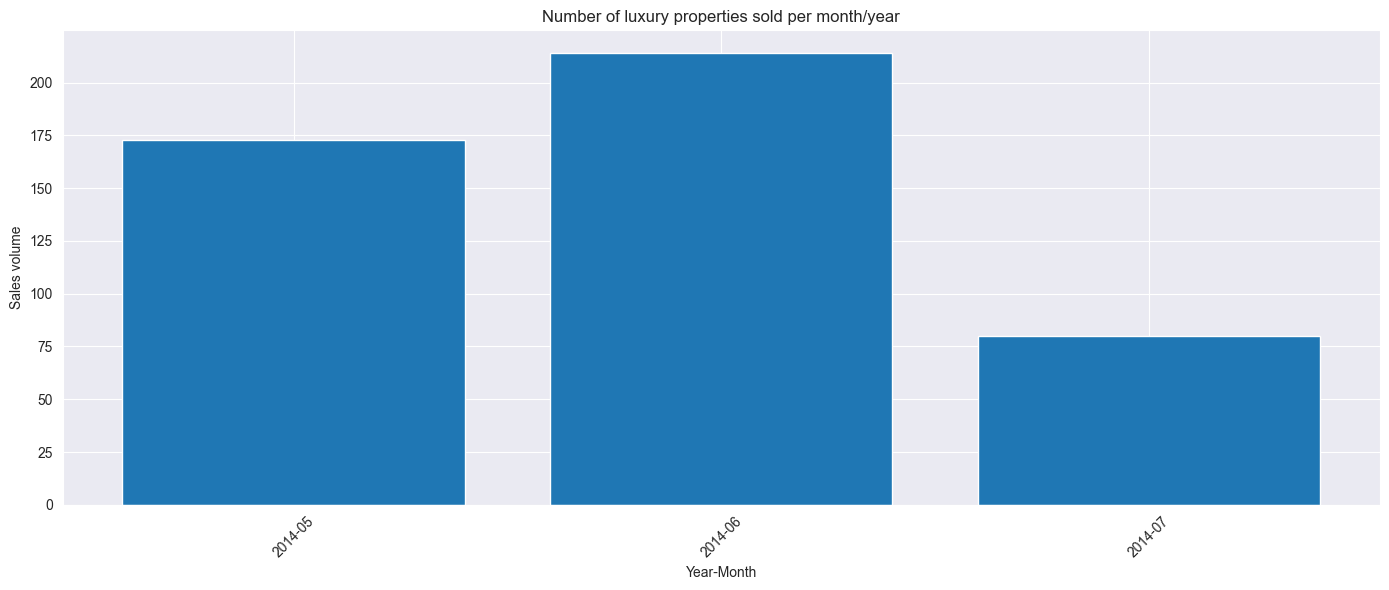

Interpretation:
- Seasonal fluctuations may indicate months with particularly high or low prices.
- The median price shows whether outliers distort the average.
- Sales volume provides insights into demand and market activity.


In [11]:
# Extended market trend analysis: seasonal patterns, median prices, sales volume
# 1. Average price per month (across all years)
luxury_df['month_name'] = luxury_df['date'].dt.strftime('%b')
monthly_avg = luxury_df.groupby('month_name')['price'].mean().reindex(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.figure(figsize=(10,5))
monthly_avg.plot(kind='line', marker='o')
plt.title('Average price of luxury properties per month (seasonal)')
plt.xlabel('Month')
plt.ylabel('Average price (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Median vs. average price per month/year
luxury_monthly_median = luxury_df.groupby(['year', 'month'])['price'].median().reset_index()
luxury_monthly_median['year_month'] = luxury_monthly_median['year'].astype(str) + '-' + luxury_monthly_median['month'].astype(str).str.zfill(2)
plt.figure(figsize=(14,6))
plt.plot(luxury_monthly['year_month'], luxury_monthly['price'], label='Average', marker='o')
plt.plot(luxury_monthly_median['year_month'], luxury_monthly_median['price'], label='Median', marker='x')
plt.xticks(rotation=45)
plt.title('Average vs. median price of luxury properties over time')
plt.xlabel('Year-Month')
plt.ylabel('Price (USD)')
plt.legend()
plt.tight_layout()
plt.show()

# 3. Sales volume per month/year
luxury_monthly_count = luxury_df.groupby(['year', 'month']).size().reset_index(name='count')
luxury_monthly_count['year_month'] = luxury_monthly_count['year'].astype(str) + '-' + luxury_monthly_count['month'].astype(str).str.zfill(2)
plt.figure(figsize=(14,6))
plt.bar(luxury_monthly_count['year_month'], luxury_monthly_count['count'])
plt.xticks(rotation=45)
plt.title('Number of luxury properties sold per month/year')
plt.xlabel('Year-Month')
plt.ylabel('Sales volume')
plt.tight_layout()
plt.show()

# Interpretation:
print('Interpretation:')
print('- Seasonal fluctuations may indicate months with particularly high or low prices.')
print('- The median price shows whether outliers distort the average.')
print('- Sales volume provides insights into demand and market activity.')
